In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
# If you need to recreate the datase, uncomment the next line%
#%run create_dataset.ipynb

In [40]:
ds = pd.read_excel('dataset.xlsx', parse_dates=[0], index_col=0)

In [41]:
# Scale the data
c2s = ['UNRATE','ICNSA','ACOGNO','NEWORDER','PERMIT','UMCSENT','PSAVERT','vix']
scaler = StandardScaler()
ds[c2s] = scaler.fit_transform(ds[c2s])

In [42]:
# The last two columns in data set are the real future data to be predicted
X = ds.iloc[:,:-2]

In [43]:
# The last column is a category up +1 or down -1
y = ds.iloc[:,-1]

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
# Get Liner Regression done
clf = LogisticRegression(penalty = None, solver='lbfgs', max_iter=1000000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000000, penalty=None)

In [46]:
pred = clf.predict(X_train)
accuracy_score(y_train, pred)

0.7722737615963592

In [47]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.768068599428338

# Try to improve generalization

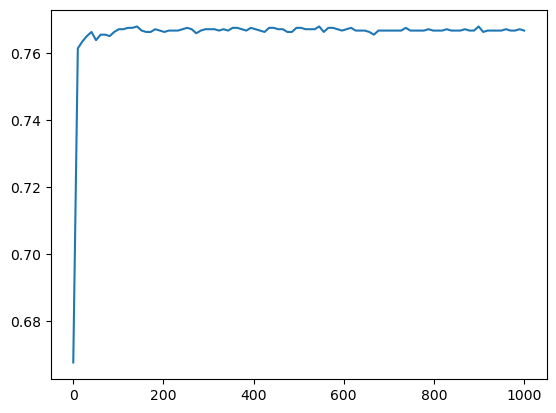

In [64]:
accuracy = []
points = 100
reg = np.linspace(1e-2, 1000, points)
for i in range(points):
    model = LogisticRegression(penalty='l2', C= reg[i], max_iter=1000000)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred))
plt.plot(reg, accuracy)

In [65]:
# Find the best regularization constant
max_accuracy = max(accuracy)
best_c = reg[accuracy.index(max_accuracy)]
print("The max accuracy is", max_accuracy, ", with regularization constant C =", best_c)

The max accuracy is 0.768068599428338 , with regularization constant C = 141.4227272727273


In [68]:
model = LogisticRegression(penalty='l2', C= best_c, max_iter=1000000)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.768068599428338

In [69]:
print(confusion_matrix(y_test, pred))

[[ 483  408]
 [ 160 1398]]


# Train Liner Regresstion for the all data set

In [70]:
clf0 = LogisticRegression(penalty='l2', C= best_c)
clf.fit(X, y)

LogisticRegression(max_iter=1000000, penalty=None)

In [71]:
predict = clf.predict(X)
accuracy_score(y, predict)

0.774197500612595

In [72]:
print(confusion_matrix(y, predict))

[[1644 1275]
 [ 568 4675]]


In [73]:
probability = np.max(clf.predict_proba(X), axis = 1)

In [74]:
ds['Prediction'] = predict
ds['Probability'] = probability

In [75]:
pd.DataFrame(ds).to_excel('result_dt.xlsx')

In [76]:
ds.describe()

,DFF,DGS10,T10_3,UNRATE,ICNSA,ACOGNO,NEWORDER,AWHMAN,PERMIT,UMCSENT,...,pr_5,pr_6,pr_7,pr_8,pr_9,pr_10,ma20gr_fut,dir_fut,Prediction,Probability
count,8162.000000,8162.000000,8162.000000,8.162000e+03,8.162000e+03,8.162000e+03,8.162000e+03,8162.000000,8.162000e+03,8.162000e+03,...,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000,8162.000000
mean,2.563370,4.002111,1.593827,5.571519e-17,2.089319e-17,9.471582e-16,3.342911e-16,1.202291,5.571519e-17,6.407246e-16,...,0.001383,0.001048,0.000718,0.000393,0.000071,-0.000245,0.006995,0.284734,0.457976,0.772430
std,2.191967,1.765468,1.232822,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,0.606064,1.000061e+00,1.000061e+00,...,0.016858,0.015700,0.014766,0.014115,0.013763,0.013756,0.035025,0.958665,0.889019,0.138149
min,0.040000,0.520000,-1.730000,-1.286276e+00,-6.858048e-01,-2.835318e+00,-1.876998e+00,-1.500000,-2.136381e+00,-2.675443e+00,...,-0.157828,-0.146553,-0.138912,-0.132208,-0.126792,-0.125330,-0.212308,-1.000000,-1.000000,0.500004
25%,0.180000,2.470000,0.690000,-7.277872e-01,-3.421500e-01,-8.350496e-01,-7.737638e-01,0.800000,-6.326911e-01,-7.269143e-01,...,-0.006285,-0.006133,-0.006052,-0.006082,-0.006331,-0.006715,-0.009839,-1.000000,-1.000000,0.659739
50%,2.030000,4.000000,1.600000,-1.692984e-01,-1.598888e-01,-8.264540e-02,-1.737946e-01,1.300000,6.571703e-02,2.212201e-01,...,0.003469,0.002947,0.002374,0.001803,0.001297,0.000674,0.011657,1.000000,1.000000,0.787825
75%,4.990000,5.410000,2.610000,5.008883e-01,7.739956e-02,7.004390e-01,6.469365e-01,1.700000,6.920474e-01,7.288827e-01,...,0.011138,0.010163,0.009122,0.008278,0.007470,0.006878,0.027977,1.000000,1.000000,0.884997
max,7.800000,8.050000,3.940000,5.080497e+00,1.841783e+01,2.192869e+00,2.860674e+00,2.300000,2.213135e+00,1.953245e+00,...,0.085783,0.082464,0.084515,0.088462,0.096451,0.102215,0.127029,1.000000,1.000000,1.000000
